In [3]:
# add dependencies
import pandas as pd

In [4]:
# pull in dataframe
clean = pd.read_csv("cleaned_data.csv")
clean.head()

,Unnamed: 0,Country,Water Body ID,Year,Unit of Measure,Value,Population Density,GDP
0,13,France,FRGR0005B,2009,[pH],7.68919,122.299437,2.806036e+12
1,16,France,FRGR1496,2009,mg{O2}/L,1.06250,122.299437,2.806036e+12
2,18,France,FRGR0004A,2009,[pH],7.63017,122.299437,2.806036e+12
3,29,France,FRDR173A,2009,mg{O2}/L,1.10833,122.299437,2.806036e+12
4,31,France,FRGR0173,2009,mg{O2}/L,1.76667,122.299437,2.806036e+12


In [5]:
# determine how many countries are in data
clean["Country"].unique()

array(['France', 'Spain', 'Lithuania', 'United Kingdom', 'Germany',
       'Bulgaria', 'Denmark', 'Italy', 'Finland', 'Ireland', 'Belgium',
       'Sweden', 'Portugal', 'Czech Republic', 'Serbia', 'Romania',
       'Switzerland', 'Latvia', 'Austria', 'Luxembourg', 'Norway',
       'Croatia', 'Belarus'], dtype=object)

In [6]:
# determine number of years included in the data
france_water = clean[(clean['Country'] == 'France')]
france_water
france_bodies = france_water.groupby('Water Body ID').count()


In [ ]:
#eric country cleaning

In [ ]:
#eric country cleaning

In [ ]:
#eric country cleaning

In [ ]:
#eric country cleaning

In [ ]:
#eric country cleaning

In [ ]:
#eric country cleaning

In [ ]:
#eric country cleaning

In [46]:
# nora population density
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

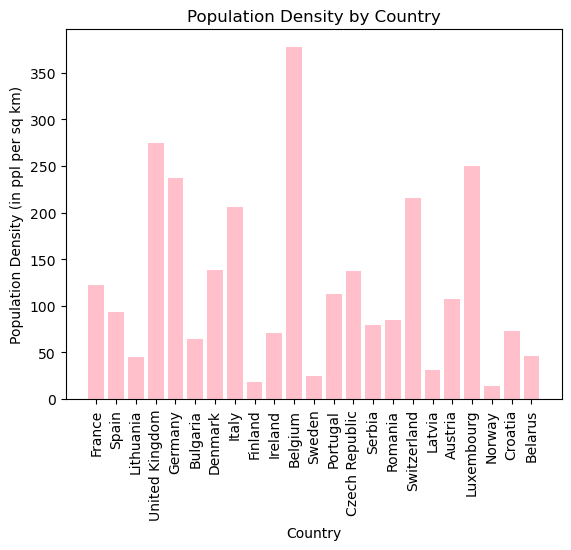

In [40]:
# nora
x_axis = clean["Country"]
y_axis = clean["Population Density"]

plt.bar(x_axis, y_axis, color="pink", align="center")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Population Density (in ppl per sq km)")
plt.title("Population Density by Country")
plt.show()

In [74]:
# nora
oxy_data = clean.loc[clean["Unit of Measure"] == "mg{O2}/L", :]
oxy_country = oxy_data.set_index("Country").groupby(["Country"])
oxy_country_mean = oxy_country["Value"].mean()
oxy_popden = oxy_country["Population Density"].mean()
oxy_summary = pd.DataFrame({"Population Density": oxy_popden, "Avg Oxygen Levels (in mg{O2}/L)": oxy_country_mean,})
oxy_summary

,Population Density,Avg Oxygen Levels (in mg{O2}/L)
Country,,
Austria,107.127967,3.714332
Belarus,46.719504,1.070000
Belgium,377.379590,5.824079
Bulgaria,64.711100,7.863195
Croatia,73.049375,4.666667
Czech Republic,137.657705,8.975000
Denmark,137.976566,1.318566
Finland,18.148547,12.626858
France,122.299437,3.769420


The correlation between population density and the average dissolved oxygen is -0.32


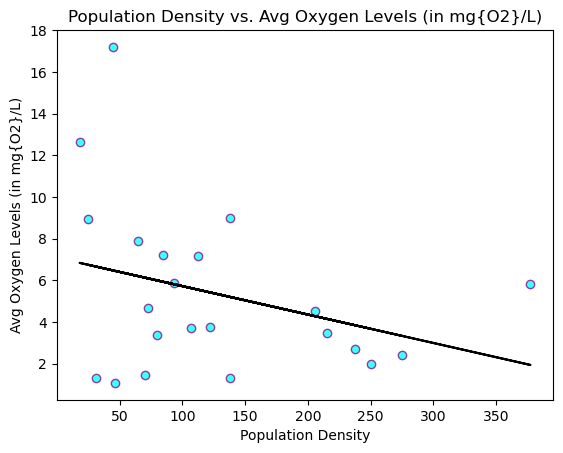

In [83]:
# nora
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(oxy_summary["Population Density"],oxy_summary["Avg Oxygen Levels (in mg{O2}/L)"])
regress_oxyvalues = oxy_summary["Population Density"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#calculate correlation coefficient
co_oxy = st.pearsonr(oxy_summary["Population Density"],oxy_summary["Avg Oxygen Levels (in mg{O2}/L)"])
print(f"The correlation between population density and the average dissolved oxygen is {round(co_oxy[0],2)}")

#make pH scatterplot
x_axis = oxy_summary["Population Density"]
y_axis = oxy_summary["Avg Oxygen Levels (in mg{O2}/L)"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='cyan', edgecolors='purple', alpha=0.75)
plt.title('Population Density vs. Avg Oxygen Levels (in mg{O2}/L)')
plt.xlabel('Population Density')
plt.ylabel('Avg Oxygen Levels (in mg{O2}/L)')
plt.plot(oxy_summary["Population Density"], regress_oxyvalues, color="black")
plt.show()

In [76]:
# nora
temp_data = clean.loc[clean["Unit of Measure"] == "Cel", :]
temp_country = temp_data.set_index("Country").groupby(["Country"])
temp_country_mean = temp_country["Value"].mean()
temp_popden = temp_country["Population Density"].mean()
temp_country_mean
temp_summary = pd.DataFrame({"Population Density": temp_popden, "Avg Water Temp (in deg Celsius)": temp_country_mean,})
temp_summary

,Population Density,Avg Water Temp (in deg Celsius)
Country,,
Austria,107.127967,10.822500
Belgium,377.379590,11.623625
Bulgaria,64.711100,13.821118
Croatia,73.049375,12.800000
Finland,18.148547,9.736109
France,122.299437,12.083606
Germany,237.307597,12.326872
Ireland,70.653448,9.770577
Italy,205.418372,16.337430


The correlation between population density and the average water temperature is -0.02


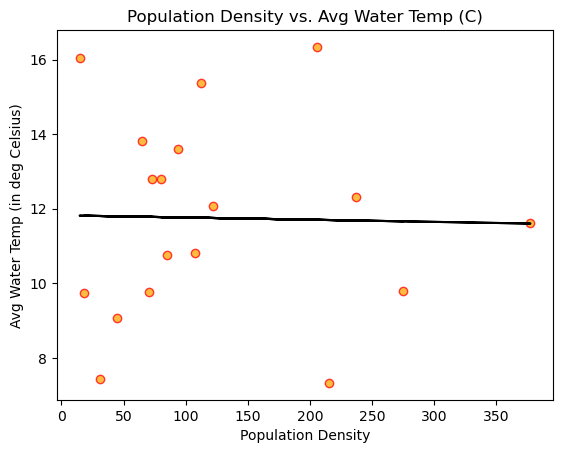

In [81]:
# nora
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(temp_summary["Population Density"],temp_summary["Avg Water Temp (in deg Celsius)"])
regress_tempvalues = temp_summary["Population Density"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#calculate correlation coefficient
co_temp = st.pearsonr(temp_summary["Population Density"],temp_summary["Avg Water Temp (in deg Celsius)"])
print(f"The correlation between population density and the average water temperature is {round(co_temp[0],2)}")

#make pH scatterplot
x_axis = temp_summary["Population Density"]
y_axis = temp_summary["Avg Water Temp (in deg Celsius)"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='orange', edgecolors='red', alpha=0.75)
plt.title('Population Density vs. Avg Water Temp (C)')
plt.xlabel('Population Density')
plt.ylabel('Avg Water Temp (in deg Celsius)')
plt.plot(temp_summary["Population Density"], regress_tempvalues, color="black")
plt.show()


In [78]:
# nora
ph_data = clean.loc[clean["Unit of Measure"] == "[pH]", :]
ph_country = ph_data.set_index("Country").groupby(["Country"])
ph_country_mean = ph_country["Value"].mean()
ph_popden = ph_country["Population Density"].mean()
ph_country_mean
ph_summary = pd.DataFrame({"Population Density": ph_popden, "Avg Water pH": ph_country_mean,})
ph_summary

,Population Density,Avg Water pH
Country,,
Austria,107.127967,8.221665
Belgium,377.379590,7.771786
Bulgaria,64.711100,7.954444
Croatia,73.049375,7.900000
Finland,18.148547,6.745819
France,122.299437,7.751359
Germany,237.307597,7.827198
Ireland,70.653448,7.266670
Italy,205.418372,8.008182


The correlation between population density and the average water pH is 0.35


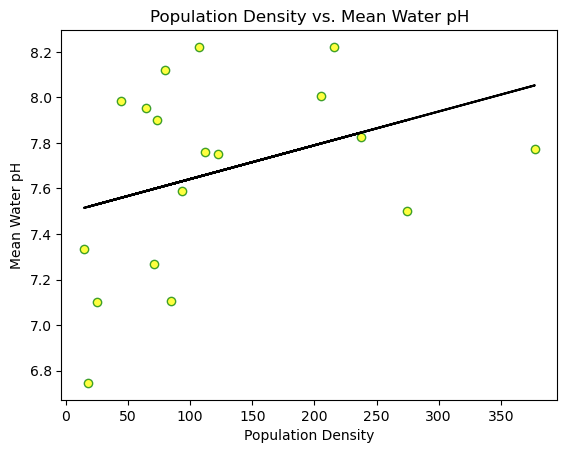

In [82]:
# nora
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(ph_summary["Population Density"],ph_summary["Avg Water pH"])
regress_values = ph_summary["Population Density"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#calculate correlation coefficient
co_ph = st.pearsonr(ph_summary["Population Density"],ph_summary["Avg Water pH"])
print(f"The correlation between population density and the average water pH is {round(co_ph[0],2)}")

#make pH scatterplot
x_axis = ph_summary["Population Density"]
y_axis = ph_summary["Avg Water pH"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='yellow', edgecolors='green', alpha=0.75)
plt.title('Population Density vs. Mean Water pH')
plt.xlabel('Population Density')
plt.ylabel('Mean Water pH')
plt.plot(ph_summary["Population Density"], regress_values, color="black")
plt.show()

In [ ]:
# chris gdp

In [ ]:
# chris gdp

In [ ]:
# chris gdp

In [ ]:
# chris gdp

In [ ]:
# chris gdp

In [ ]:
# chris gdp

In [ ]:
# chris gdp

In [ ]:
# chris gdp